In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance_modified.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [ ]:
df.ffill()
df.bfill()
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [ ]:
df.dtypes


gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [ ]:
df['math score'] = df['math score'].replace('?', np.nan)
df['math score'] = df['math score'].astype(float)
df['math score'].fillna(df['math score'].mean(), inplace=True)

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


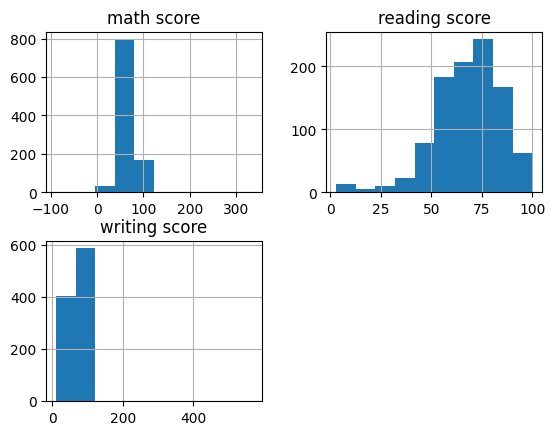

In [ ]:
df.hist()
plt.show()

<Axes: >

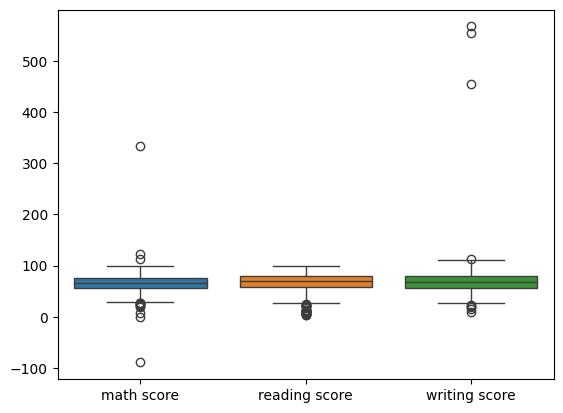

In [ ]:
sns.boxplot(df)

<Axes: ylabel='math score'>

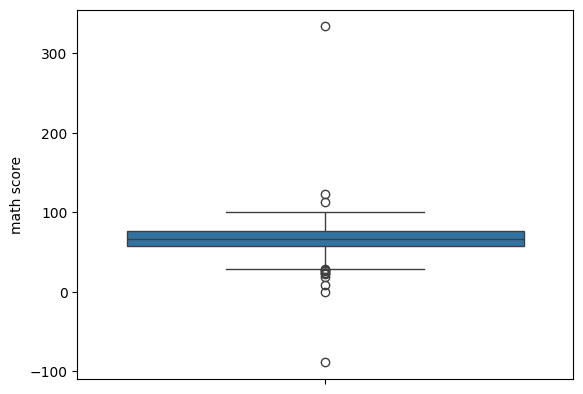

In [ ]:
sns.boxplot(df['math score'])


In [ ]:
# Outlier Detection -> Z-score
z = np.abs(stats.zscore(df['math score']))

arr = np.where(z > 3)
arr

(array([ 59, 431, 456, 474, 980]),)

In [ ]:
df.shape


(1000, 8)

In [ ]:
# Outlier Detection -> IQR
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

df = df[(df['math score'] > lower) & (df['math score'] < upper)]
df.shape

(986, 8)

<Axes: ylabel='math score'>

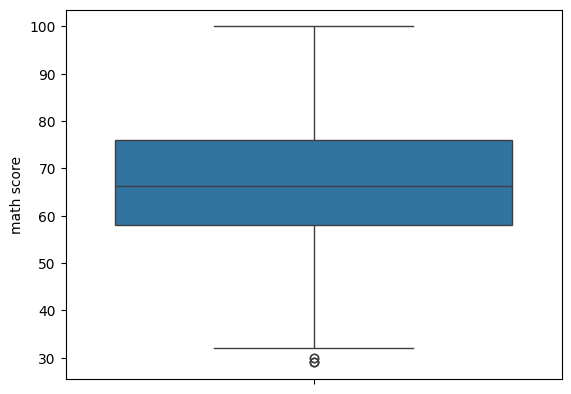

In [ ]:
sns.boxplot(df['math score'])


In [ ]:
# Robust Scaling
numeric_data = df.select_dtypes(include=['float64', 'int64'])
scaler = RobustScaler()
scaled_data = scaler.fit_transform(numeric_data)

-0.04326183421104021

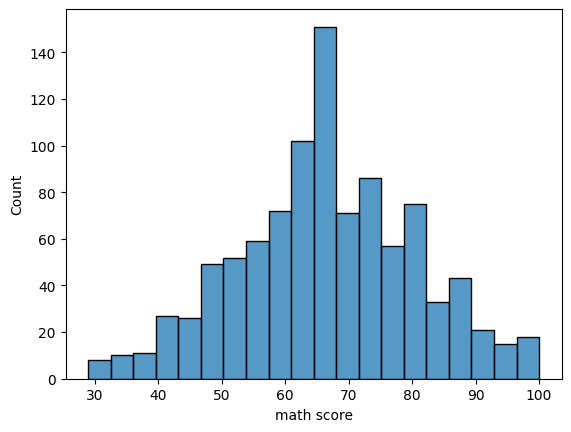

In [ ]:
# Data Transformation
sns.histplot(df['math score']) # Almost normal
df['math score'].skew()

In [ ]:
df.shape

(986, 8)

<Axes: xlabel='writing score', ylabel='Count'>

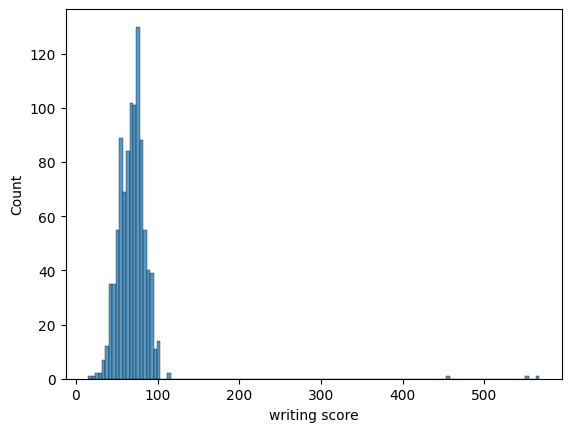

In [ ]:
|df['writing score'].skew() # High Skewness -> due to outliers
sns.histplot(df['writing score'])


<ipython-input-18-1f6dd355cbe1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['writing score'] = np.sqrt(df['writing score'])


4.980432641684051

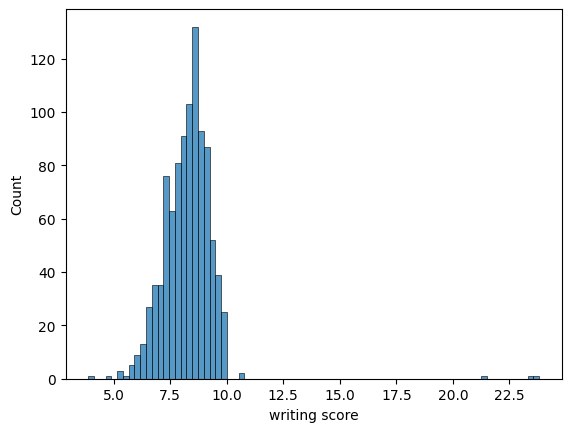

In [ ]:
df['writing score']
# Square Root ->
df['writing score'] = np.sqrt(df['writing score'])
sns.histplot(df['writing score'])
df['writing score'].skew() # Removing skewness with transformation